In [2]:
import sys, os
from os.path import join, dirname, abspath
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure, Axes
import numpy as np
import networkx as nx
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable

from string import ascii_uppercase
plt.rcParams.update({
    "text.usetex": False,
    "ytick.minor.visible":True,
    "xtick.minor.visible":True,
    'xtick.direction': "in",
    'ytick.direction': "in"
})
outdir = "out"
os.makedirs(outdir,exist_ok=True)
def out(fname): return join(outdir,fname)
def savefig(plot_name): 
    plt.savefig(out(plot_name),bbox_inches="tight",dpi=250)
import pandas as pd
from numpy.linalg import matrix_power, eig

def arr_to_latex(M):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r'\\' + '\n').join('&'.join(str(x) for x in row) for row in M) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

def vec_to_latex(x,round=3):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r' \\ ').join(str(np.round(v,round)) for v in x) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

In [3]:
from car import Car
from tiles import Road, Exit
from world import World

In [4]:
GRID_WIDTH = 5
GRID_HEIGHT = 6

In [5]:
road_tiles = []
for i in range(0,GRID_WIDTH):
    for j in range(0,GRID_HEIGHT):
        if not ((j == 2 or j == 3) and i == 2):
            road_tiles.append(Road(i,j,np.ones(9)/9))
len(road_tiles)

28

In [6]:
w = World(tiles=road_tiles,cars=[])

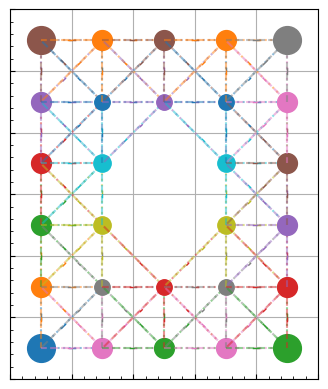

In [7]:
w.draw()

In [36]:
num_steps = 250

In [37]:
m = w.markov
c = np.zeros(m.shape[0])
c[0] = 1
car_locs = [c]
for _ in range(num_steps-1):
    # car_locs.append(car_locs[-1]@m)
    car_locs.append(m@car_locs[-1].T)
car_locs = np.array(car_locs)

In [38]:
car_locs.shape

(250, 28)

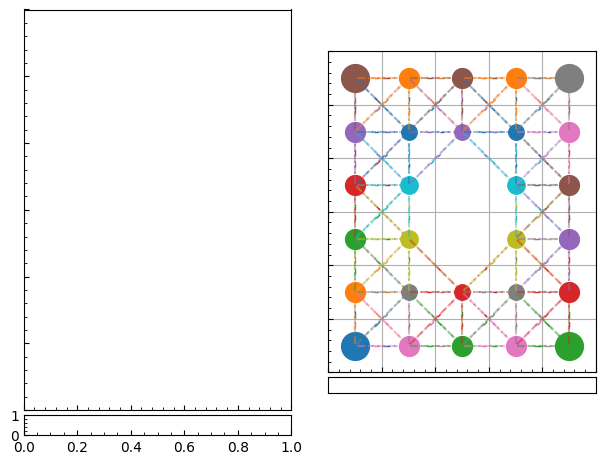

In [41]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True)
fig.tight_layout()
div = make_axes_locatable(axes[0])
cax = div.append_axes("bottom", size="5%", pad=0.05)
d2 = make_axes_locatable(axes[1])
cax2 = d2.append_axes("bottom", size="5%", pad=0.05)
cax2.get_xaxis().set_visible(False)
cax2.get_yaxis().set_visible(False)
w.draw(ax=axes[1],connections=True)
def update(frame):
    ax = axes[0]
    ax.cla()
    cax.cla()
    heatmap = np.zeros((GRID_HEIGHT,GRID_WIDTH))
    for i,t in enumerate(w._tiles):
        heatmap[t.y,t.x] = car_locs[frame][i]
    im = ax.imshow(heatmap,cmap="inferno",origin="lower",vmin=min(car_locs[i]),vmax=max(car_locs[i]))
    cb1 = fig.colorbar(im,cax=cax,label="P(Car in Tile)",location="bottom")
    # cb1 = fig.colorbar(im,ax=ax,label="P(Car in Tile)",location="bottom")
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.bar(np.arange(len(car_locs[frame])),car_locs[frame])
    # ax.set_ylim(0,1)
    # ax.set_xlabel("Road Tile")
    # ax.set_ylabel("P(Road Tile)")
    fig.suptitle("Markov Chain Model for Car in Network")
    ax.set_title(f"t = {frame}")

    
ani = animation.FuncAnimation(fig,update,frames=len(car_locs),interval=100)
ani.save(filename=out("one_car.gif"), writer="pillow",dpi=150)

In [21]:
car_locs[-1]

array([0.02272727, 0.02272727, 0.02272727, 0.02272727, 0.02272727,
       0.02272727, 0.02272727, 0.02272727, 0.02272727, 0.02272727,
       0.02272727, 0.02272727, 0.02272727, 0.02272727, 0.02272727,
       0.02272727, 0.02272727, 0.02272727, 0.02272727, 0.02272727,
       0.02272727, 0.02272727, 0.02272727, 0.02272727, 0.02272727,
       0.02272727, 0.02272727, 0.02272727])

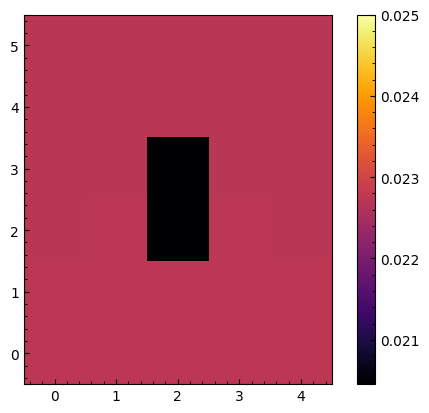

In [27]:
heatmap = np.zeros((GRID_HEIGHT,GRID_WIDTH))
for i,t in enumerate(w._tiles):
    heatmap[t.y,t.x] = car_locs[-1][i]
im=plt.imshow(heatmap,cmap="inferno",origin="lower",vmin=min(car_locs[-1]),vmax=max(car_locs[-1]))
plt.colorbar(im)

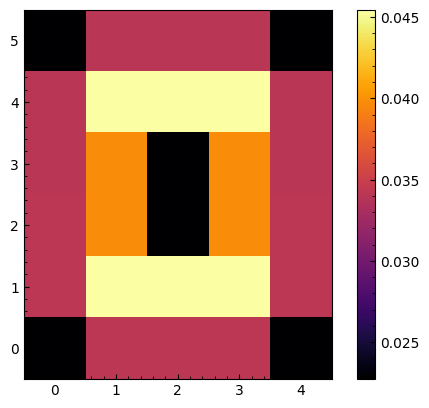

In [24]:
heatmap = np.zeros((GRID_HEIGHT,GRID_WIDTH))
for i,t in enumerate(w._tiles):
    heatmap[t.y,t.x] = car_locs[-1][i]
im=plt.imshow(heatmap,cmap="inferno",origin="lower",vmin=min(car_locs[-1]),vmax=max(car_locs[-1]))
plt.colorbar(im)

In [ ]:
fig, ax = plt.subplots()

for r in road_tiles:
    r.plot(ax)
shift_amount = 0.5

print(ax.get_xticks())

xticks = np.arange(GRID_WIDTH) + shift_amount
yticks = np.arange(GRID_WIDTH) + shift_amount

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect('equal')

# Enable the grid
ax.grid(which="major")


In [ ]:
# p_directions goes clockwise:
    #[ p(N)    0
    #  p(NE)   1
    #  p(E)    2
    #  p(SE)   3
    #  p(S)    4
    #  p(SW)   5
    #  p(W)    6
    #  p(NW)   7
    #  p(stay) 8 ]
# must sum to 1
NORTH = np.array([1,0,0,0,0,0,0,0,0])
NORTHEAST = np.array([0,1,0,0,0,0,0,0,0])
EAST = np.array([0,0,1,0,0,0,0,0,0])
SOUTHEAST = np.array([0,0,0,1,0,0,0,0,0])
SOUTH = np.array([0,0,0,0,1,0,0,0,0])
SOUTHWEST = np.array([0,0,0,0,0,1,0,0,0])
WEST = np.array([0,0,0,0,0,0,1,0,0])
NORTHWEST = np.array([0,0,0,0,0,0,0,1,0])
STAY = np.array([0,0,0,0,0,0,0,0,1])
NORTH_NORTHEAST = 0.75*NORTH + 0.25*NORTHEAST
NORTH_NORTHWEST = 0.75*NORTH + 0.25*NORTHWEST
NORTH_NORTHEAST_NORTHWEST = 0.75*NORTH + 0.125*NORTHEAST + 0.125*NORTHWEST
EAST_NORTHEAST = 0.75*EAST + 0.25*NORTHEAST
EAST_SOUTHEAST = 0.75*EAST + 0.25*SOUTHEAST
EAST_NORTHEAST_SOUTHEAST = 0.75*EAST + 0.125*NORTHEAST + 0.125*SOUTHEAST
SOUTH_SOUTHEAST = 0.75*SOUTH + 0.25*SOUTHEAST
SOUTH_SOUTHWEST = 0.75*SOUTH + 0.25*SOUTHWEST
SOUTH_SOUTHEAST_SOUTHWEST = 0.75*SOUTH + 0.125*SOUTHEAST + 0.125*SOUTHWEST

directions = [NORTH, NORTHEAST, EAST, SOUTHEAST, SOUTH, SOUTHWEST, WEST, NORTHWEST, STAY,
              NORTH_NORTHEAST, NORTH_NORTHWEST, NORTH_NORTHEAST_NORTHWEST, EAST_NORTHEAST, EAST_SOUTHEAST, EAST_NORTHEAST_SOUTHEAST,
              SOUTH_SOUTHEAST, SOUTH_SOUTHWEST, SOUTH_SOUTHEAST_SOUTHWEST]
direction_names = ["NORTH", "NORTHEAST", "EAST", "SOUTHEAST", "SOUTH", "SOUTHWEST", "WEST", "NORTHWEST", "STAY","NORTH-NORTHEAST", "NORTH-NORTHWEST", "NORTH-NORTHEAST-NORTHWEST", "EAST-NORTHEAST", "EAST-SOUTHEAST", "EAST-NORTHEAST-SOUTHEAST","SOUTH-SOUTHEAST", "SOUTH-SOUTHWEST", "SOUTH-SOUTHEAST-SOUTHWEST"]

In [ ]:
# for dir, name in zip(directions,direction_names):
#     fig, ax = plt.subplots()
#     r = Road(1,1,dir)
#     r.plot(ax)
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_aspect('equal')
#     ax.set_title(name)